In [ ]:
!pip install gymnasium gymnasium[mujoco]
!pip install 'shimmy>=0.2.1'
!pip install gymnasium
!pip install -- upgrade stable - baselines3
!pip install mujoco
!pip install stable-baselines3
!pip install --upgrade gym stable-baselines3

  Using cached gymnasium-1.0.0a2-py3-none-any.whl (954 kB)
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 0.29.1
    Uninstalling gymnasium-0.29.1:
      Successfully uninstalled gymnasium-0.29.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 2.3.2 requires gymnasium<0.30,>=0.28.1, but you have gymnasium 1.0.0a2 which is incompatible.
ERROR: Invalid requirement: '-'
  Using cached gymnasium-0.29.1-py3-none-any.whl (953 kB)
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.0.0a2
    Uninstalling gymnasium-1.0.0a2:
      Successfully uninstalled gymnasium-1.0.0a2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shimmy 2.0.0 requires gymnasium>=1.0.0a1, but you ha

In [ ]:
#Part 1
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import VecNormalize, SubprocVecEnv
from stable_baselines3.common.env_util import make_vec_env

#Create the environment with VecNormalize
def create_env():
    env = make_vec_env('Hopper-v4', n_envs=1)
    env = VecNormalize(env, norm_obs=True, norm_reward=True)
    return env

if __name__ == "__main__":
    #Creating the environment
    env = create_env()

    #Train the PPO agent
    model = PPO("MlpPolicy", env, verbose=1, learning_rate=3e-4, n_steps=2048, batch_size=64,
                ent_coef=0.0, gamma=0.99, gae_lambda=0.95, clip_range=0.2, tensorboard_log="./tb_logs/")

    model.learn(total_timesteps=int(20000))  # Adjust total_timesteps as needed

    #Save it
    model.save('ppo_hopper')

    env.save('hopper_vecnormalize.pkl')

    env.training = False
    env.norm_reward = False

Using cpu device
Logging to ./tb_logs/PPO_127
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.8     |
|    ep_rew_mean     | 16.2     |
| time/              |          |
|    fps             | 825      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 24.8        |
|    ep_rew_mean          | 25.6        |
| time/                   |             |
|    fps                  | 655         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013198303 |
|    clip_fraction        | 0.118       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.25       |
|    explained_variance   

In [ ]:
#Part 2.1

import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env

class ChangeMassWrapper(gym.Wrapper):
    def __init__(self, env, torso_mass):
        super().__init__(env)
        self.torso_mass = torso_mass
        self.env.unwrapped.model.body_mass[1] = self.torso_mass

#Setting environments to 1
n_envs = 1
random_seeds = [0, 1, 2]

#Set torso mass to 3
torso_masses = [3.0]

trained_models = {}

for torso_mass in torso_masses:
    print(f"Creating environment for torso mass: {torso_mass}")
    #DummyVecEnv and the custom wrapper implementation
    env = make_vec_env('Hopper-v4', n_envs=n_envs, seed=random_seeds[0], vec_env_cls=DummyVecEnv,
                       wrapper_class=lambda env: ChangeMassWrapper(env, torso_mass=torso_mass))

    for seed in random_seeds:
        print(f"Training model with torso mass: {torso_mass} and seed: {seed}")
        #train the PPO agent
        model = PPO("MlpPolicy", env, verbose=1, learning_rate=3e-4, n_steps=2048, batch_size=64,
                    ent_coef=0.0, gamma=0.99, gae_lambda=0.95, clip_range=0.2, tensorboard_log="./tb_logs/",
                    seed=seed)

        model.learn(total_timesteps=int(100000))

        #Save the model
        model.save(f'ppo_hopper_seed_{seed}_torso_1PPO')
        trained_models[(torso_mass, seed)] = model

        #Reset the environment
        env.reset()

print("All training sessions are complete.")

Creating environment for torso mass: 3.0
Training model with torso mass: 3.0 and seed: 0
Using cpu device
Logging to ./tb_logs/PPO_18
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 17.9     |
|    ep_rew_mean     | 13       |
| time/              |          |
|    fps             | 909      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26.1        |
|    ep_rew_mean          | 27.3        |
| time/                   |             |
|    fps                  | 680         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014136605 |
|    clip_fraction        | 0.181       |
|    clip_range       

In [ ]:
#Part 2.2

import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env

class ChangeMassWrapper(gym.Wrapper):
    def __init__(self, env, torso_mass):
        super().__init__(env)
        self.torso_mass = torso_mass
        self.env.unwrapped.model.body_mass[1] = self.torso_mass

#Set environments to 1
n_envs = 1
random_seeds = [0, 1, 2]

#Set torso mass to 6
torso_masses = [6.0]

trained_models = {}

for torso_mass in torso_masses:
    print(f"Creating environment for torso mass: {torso_mass}")
    #Implement DummyVecEnv and the custom wrapper
    env = make_vec_env('Hopper-v4', n_envs=n_envs, seed=random_seeds[0], vec_env_cls=DummyVecEnv,
                       wrapper_class=lambda env: ChangeMassWrapper(env, torso_mass=torso_mass))

    for seed in random_seeds:
        print(f"Training model with torso mass: {torso_mass} and seed: {seed}")
        #Train the PPO agent
        model = PPO("MlpPolicy", env, verbose=1, learning_rate=3e-4, n_steps=2048, batch_size=64,
                    ent_coef=0.0, gamma=0.99, gae_lambda=0.95, clip_range=0.2, tensorboard_log="./tb_logs/",
                    seed=seed)

        model.learn(total_timesteps=int(100000))

        #Saving
        model.save(f'ppo_hopper_seed_{seed}_torso_2PPO')
        trained_models[(torso_mass, seed)] = model

        #Reset environment
        env.reset()

print("All training sessions are complete.")

Creating environment for torso mass: 6.0
Training model with torso mass: 6.0 and seed: 0
Using cpu device
Logging to ./tb_logs/PPO_15
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 18.6     |
|    ep_rew_mean     | 14.6     |
| time/              |          |
|    fps             | 869      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 27.7        |
|    ep_rew_mean          | 27.3        |
| time/                   |             |
|    fps                  | 641         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015330469 |
|    clip_fraction        | 0.173       |
|    clip_range       

In [ ]:
#Part 2.3

import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env

class ChangeMassWrapper(gym.Wrapper):
    def __init__(self, env, torso_mass):
        super().__init__(env)
        self.torso_mass = torso_mass
        self.env.unwrapped.model.body_mass[1] = self.torso_mass

#Set environments to 1
n_envs = 1
random_seeds = [0, 1, 2]

#Set torso mass to 9
torso_masses = [9.0]

trained_models = {}

for torso_mass in torso_masses:
    print(f"Creating environment for torso mass: {torso_mass}")
    #Implement DummyVecEnv and the custom wrapper
    env = make_vec_env('Hopper-v4', n_envs=n_envs, seed=random_seeds[0], vec_env_cls=DummyVecEnv,
                       wrapper_class=lambda env: ChangeMassWrapper(env, torso_mass=torso_mass))

    for seed in random_seeds:
        print(f"Training model with torso mass: {torso_mass} and seed: {seed}")
        #Train the PPO agent
        model = PPO("MlpPolicy", env, verbose=1, learning_rate=3e-4, n_steps=2048, batch_size=64,
                    ent_coef=0.0, gamma=0.99, gae_lambda=0.95, clip_range=0.2, tensorboard_log="./tb_logs/",
                    seed=seed)

        model.learn(total_timesteps=int(100000))

        #Saving
        model.save(f'ppo_hopper_seed_{seed}_torso_3PPO')
        trained_models[(torso_mass, seed)] = model

        #Reset the environment
        env.reset()

print("All training sessions are complete.")

Creating environment for torso mass: 9.0
Training model with torso mass: 9.0 and seed: 0
Using cpu device
Logging to ./tb_logs/PPO_21
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20       |
|    ep_rew_mean     | 16.5     |
| time/              |          |
|    fps             | 795      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 27.9        |
|    ep_rew_mean          | 26.8        |
| time/                   |             |
|    fps                  | 573         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015378805 |
|    clip_fraction        | 0.163       |
|    clip_range       

In [ ]:
#part 2.1.2 (extensive)

import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env

class ChangeMassWrapper(gym.Wrapper):
    def __init__(self, env, torso_mass):
        super().__init__(env)
        self.torso_mass = torso_mass
        self.env.unwrapped.model.body_mass[1] = self.torso_mass

#Set environment to 1
n_envs = 1
random_seeds = [0, 1, 2]

#Set torso mass to 3
torso_masses = [3.0]

trained_models = {}

for torso_mass in torso_masses:
    print(f"Creating environment for torso mass: {torso_mass}")
    #Implement DummyVecEnv and the custom wrapper
    env = make_vec_env('Hopper-v4', n_envs=n_envs, seed=random_seeds[0], vec_env_cls=DummyVecEnv,
                       wrapper_class=lambda env: ChangeMassWrapper(env, torso_mass=torso_mass))

    for seed in random_seeds:
        print(f"Training model with torso mass: {torso_mass} and seed: {seed}")
        #Train the PPO agent
        model = PPO("MlpPolicy", env, verbose=1, learning_rate=3e-4, n_steps=2048, batch_size=64,
                    ent_coef=0.0, gamma=0.99, gae_lambda=0.95, clip_range=0.2, tensorboard_log="./tb_logs/",
                    seed=seed)

        model.learn(total_timesteps=int(333333))

        #Saving the model
        model.save(f'ppo_hopper_seed_{seed}_torso_1PPOex')
        trained_models[(torso_mass, seed)] = model

        #Reset environment
        env.reset()

print("All training sessions are complete.")

Streaminguitvoer ingekort tot de laatste 5000 regels.
|    total_timesteps      | 202752      |
| train/                  |             |
|    approx_kl            | 0.009367695 |
|    clip_fraction        | 0.108       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.02       |
|    explained_variance   | 0.911       |
|    learning_rate        | 0.0003      |
|    loss                 | 17.4        |
|    n_updates            | 980         |
|    policy_gradient_loss | -0.00524    |
|    std                  | 0.664       |
|    value_loss           | 358         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 307         |
|    ep_rew_mean          | 973         |
| time/                   |             |
|    fps                  | 511         |
|    iterations           | 100         |
|    time_elapsed         | 400         |
|    total_timesteps  

In [ ]:
#Part 2.2.2 (extensive)

import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env

class ChangeMassWrapper(gym.Wrapper):
    def __init__(self, env, torso_mass):
        super().__init__(env)
        self.torso_mass = torso_mass
        self.env.unwrapped.model.body_mass[1] = self.torso_mass

#Set environments to 1
n_envs = 1
random_seeds = [0, 1, 2]

#Set torso mass to 6
torso_masses = [6.0]

trained_models = {}

for torso_mass in torso_masses:
    print(f"Creating environment for torso mass: {torso_mass}")
    #Implement DummyVecEnv and the custom wrapper
    env = make_vec_env('Hopper-v4', n_envs=n_envs, seed=random_seeds[0], vec_env_cls=DummyVecEnv,
                       wrapper_class=lambda env: ChangeMassWrapper(env, torso_mass=torso_mass))

    for seed in random_seeds:
        print(f"Training model with torso mass: {torso_mass} and seed: {seed}")
        #Train the PPO agent
        model = PPO("MlpPolicy", env, verbose=1, learning_rate=3e-4, n_steps=2048, batch_size=64,
                    ent_coef=0.0, gamma=0.99, gae_lambda=0.95, clip_range=0.2, tensorboard_log="./tb_logs/",
                    seed=seed)

        model.learn(total_timesteps=int(333333))

        #Saving
        model.save(f'ppo_hopper_seed_{seed}_torso_2PPOex')
        trained_models[(torso_mass, seed)] = model

        #Reset the environment
        env.reset()

print("All training sessions are complete.")

Streaminguitvoer ingekort tot de laatste 5000 regels.
|    total_timesteps      | 202752      |
| train/                  |             |
|    approx_kl            | 0.017401345 |
|    clip_fraction        | 0.158       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.2        |
|    explained_variance   | 0.922       |
|    learning_rate        | 0.0003      |
|    loss                 | 67.1        |
|    n_updates            | 980         |
|    policy_gradient_loss | -0.00878    |
|    std                  | 0.704       |
|    value_loss           | 317         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 351         |
|    ep_rew_mean          | 1.11e+03    |
| time/                   |             |
|    fps                  | 500         |
|    iterations           | 100         |
|    time_elapsed         | 409         |
|    total_timesteps  

In [ ]:
#Part 2.3.2 (extensive)

import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env

class ChangeMassWrapper(gym.Wrapper):
    def __init__(self, env, torso_mass):
        super().__init__(env)
        self.torso_mass = torso_mass
        self.env.unwrapped.model.body_mass[1] = self.torso_mass

#Set the environments to 1
n_envs = 1
random_seeds = [0, 1, 2]

#Set torso mass to 9
torso_masses = [9.0]

trained_models = {}

for torso_mass in torso_masses:
    print(f"Creating environment for torso mass: {torso_mass}")
    #Implement DummyVecEnv and the custom wrapper
    env = make_vec_env('Hopper-v4', n_envs=n_envs, seed=random_seeds[0], vec_env_cls=DummyVecEnv,
                       wrapper_class=lambda env: ChangeMassWrapper(env, torso_mass=torso_mass))

    for seed in random_seeds:
        print(f"Training model with torso mass: {torso_mass} and seed: {seed}")
        #Train the PPO agent
        model = PPO("MlpPolicy", env, verbose=1, learning_rate=3e-4, n_steps=2048, batch_size=64,
                    ent_coef=0.0, gamma=0.99, gae_lambda=0.95, clip_range=0.2, tensorboard_log="./tb_logs/",
                    seed=seed)

        model.learn(total_timesteps=int(333333))

        #Saving
        model.save(f'ppo_hopper_seed_{seed}_torso_3PPOex')
        trained_models[(torso_mass, seed)] = model

        #Resetting the environment
        env.reset()

print("All training sessions are complete.")

Streaminguitvoer ingekort tot de laatste 5000 regels.
|    total_timesteps      | 202752     |
| train/                  |            |
|    approx_kl            | 0.00919193 |
|    clip_fraction        | 0.102      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.94      |
|    explained_variance   | 0.924      |
|    learning_rate        | 0.0003     |
|    loss                 | 41.7       |
|    n_updates            | 980        |
|    policy_gradient_loss | -0.0084    |
|    std                  | 0.645      |
|    value_loss           | 339        |
----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 308          |
|    ep_rew_mean          | 976          |
| time/                   |              |
|    fps                  | 513          |
|    iterations           | 100          |
|    time_elapsed         | 398          |
|    total_timesteps      | 

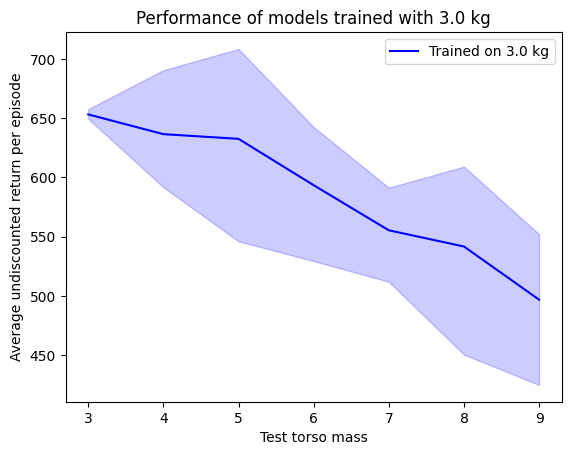

All training sessions and evaluations are complete.


In [ ]:
#Part 3.1

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3 import PPO

class ChangeMassWrapper(gym.Wrapper):
    def __init__(self, env, torso_mass):
        super().__init__(env)
        self.torso_mass = torso_mass
        self.env.unwrapped.model.body_mass[1] = self.torso_mass

#Set environments to 1
n_envs = 1
training_seeds = [0, 1, 2]

#Set torso mass to 3
torso_masses = [3.0]

#Create test torso masses
test_masses = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

#Amount of evaluation episodes
eval_episodes = 10

#Evaluation seeds
evaluation_seeds = [4,5,6,7,8,9,10,11,12,13]

results = {mass: [] for mass in torso_masses}

for torso_mass in torso_masses:
    trained_models = {}

    #Loading the trained models
    for seed in training_seeds:
        model_path = f'ppo_hopper_seed_{seed}_torso_1PPO'
        model = PPO.load(model_path)
        trained_models[seed] = model

    for test_mass in test_masses:
        returns = []
        for seed, model in trained_models.items():
            #Evaluate the model on the test seeds
            episode_returns = []
            for eval_seed in evaluation_seeds:
                test_env = make_vec_env('Hopper-v4', n_envs=n_envs, seed=eval_seed, vec_env_cls=DummyVecEnv,
                                        wrapper_class=lambda env: ChangeMassWrapper(env, torso_mass=test_mass))
                obs = test_env.reset()
                total_reward = 0
                while True:
                    action, _states = model.predict(obs)
                    obs, reward, done, _ = test_env.step(action)
                    total_reward += reward
                    if done:
                        break
                episode_returns.append(total_reward)

            #Return the avarage
            mean_return = np.mean(episode_returns)
            returns.append(mean_return)

        #Collecting results
        mean_return = np.mean(returns)
        std_return = np.std(returns)
        percentile_10 = np.percentile(returns, 10)
        percentile_90 = np.percentile(returns, 90)
        results[torso_mass].append((test_mass, mean_return, std_return, percentile_10, percentile_90))

#Plot the result
colors = {3.0: 'blue', 6.0: 'green', 9.0: 'red'}
for train_mass, data in results.items():
    test_masses, means, stds, p10s, p90s = zip(*data)
    plt.figure()
    plt.plot(test_masses, means, label=f'Trained on {train_mass} kg', color=colors[train_mass])
    plt.fill_between(test_masses, p10s, p90s, color=colors[train_mass], alpha=0.2)
    plt.xlabel('Test torso mass')
    plt.ylabel('Average undiscounted return per episode')
    plt.title(f'Performance of models trained with {train_mass} kg')
    plt.legend()
    plt.savefig(f'performance_trained_{train_mass}kg.png')
    plt.show()

print("All training sessions and evaluations are complete.")

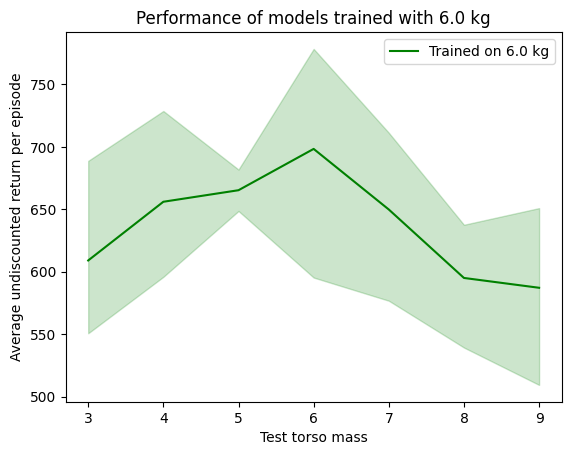

All training sessions and evaluations are complete.


In [ ]:
#Part 3.2

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3 import PPO

class ChangeMassWrapper(gym.Wrapper):
    def __init__(self, env, torso_mass):
        super().__init__(env)
        self.torso_mass = torso_mass
        self.env.unwrapped.model.body_mass[1] = self.torso_mass

#Set the environments to 1
n_envs = 1
training_seeds = [0, 1, 2]

#Set torso mass to 6
torso_masses = [6.0]

#Torso masses for testing
test_masses = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

#Amount of episodes
eval_episodes = 10

#Evaluation seeds
evaluation_seeds = [4,5,6,7,8,9,10,11,12,13]

results = {mass: [] for mass in torso_masses}

for torso_mass in torso_masses:
    trained_models = {}

    #Loading the models
    for seed in training_seeds:
        model_path = f'ppo_hopper_seed_{seed}_torso_2PPO'
        model = PPO.load(model_path)
        trained_models[seed] = model

    for test_mass in test_masses:
        returns = []
        for seed, model in trained_models.items():
            #Evaluating the model over the test seeds
            episode_returns = []
            for eval_seed in evaluation_seeds:
                test_env = make_vec_env('Hopper-v4', n_envs=n_envs, seed=eval_seed, vec_env_cls=DummyVecEnv,
                                        wrapper_class=lambda env: ChangeMassWrapper(env, torso_mass=test_mass))
                obs = test_env.reset()
                total_reward = 0
                while True:
                    action, _states = model.predict(obs)
                    obs, reward, done, _ = test_env.step(action)
                    total_reward += reward
                    if done:
                        break
                episode_returns.append(total_reward)

            #Returning the avarage
            mean_return = np.mean(episode_returns)
            returns.append(mean_return)

        #Collecting the results
        mean_return = np.mean(returns)
        std_return = np.std(returns)
        percentile_10 = np.percentile(returns, 10)
        percentile_90 = np.percentile(returns, 90)
        results[torso_mass].append((test_mass, mean_return, std_return, percentile_10, percentile_90))

#Plotting the results
colors = {3.0: 'blue', 6.0: 'green', 9.0: 'red'}
for train_mass, data in results.items():
    test_masses, means, stds, p10s, p90s = zip(*data)
    plt.figure()
    plt.plot(test_masses, means, label=f'Trained on {train_mass} kg', color=colors[train_mass])
    plt.fill_between(test_masses, p10s, p90s, color=colors[train_mass], alpha=0.2)
    plt.xlabel('Test torso mass')
    plt.ylabel('Average undiscounted return per episode')
    plt.title(f'Performance of models trained with {train_mass} kg')
    plt.legend()
    plt.savefig(f'performance_trained_{train_mass}kg.png')
    plt.show()

print("All training sessions and evaluations are complete.")

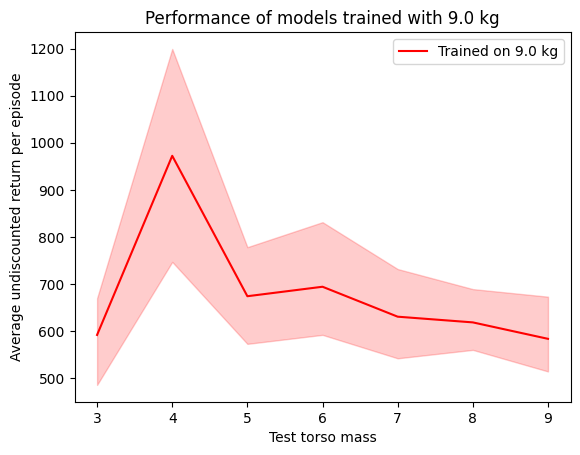

All training sessions and evaluations are complete.


In [ ]:
#Part 3.3

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3 import PPO

class ChangeMassWrapper(gym.Wrapper):
    def __init__(self, env, torso_mass):
        super().__init__(env)
        self.torso_mass = torso_mass
        self.env.unwrapped.model.body_mass[1] = self.torso_mass

#Set the environments to 1
n_envs = 1
training_seeds = [0, 1, 2]

#Set torso mass to 9
torso_masses = [9.0]

#Torso masses for testing
test_masses = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

#Evaluation episodes
eval_episodes = 10

#Test seeds
evaluation_seeds = [4,5,6,7,8,9,10,11,12,13]

results = {mass: [] for mass in torso_masses}

for torso_mass in torso_masses:
    trained_models = {}

    #Loading the models
    for seed in training_seeds:
        model_path = f'ppo_hopper_seed_{seed}_torso_3PPO'
        model = PPO.load(model_path)
        trained_models[seed] = model

    for test_mass in test_masses:
        returns = []
        for seed, model in trained_models.items():
            #Evaluating the model over the test seeds
            episode_returns = []
            for eval_seed in evaluation_seeds:
                test_env = make_vec_env('Hopper-v4', n_envs=n_envs, seed=eval_seed, vec_env_cls=DummyVecEnv,
                                        wrapper_class=lambda env: ChangeMassWrapper(env, torso_mass=test_mass))
                obs = test_env.reset()
                total_reward = 0
                while True:
                    action, _states = model.predict(obs)
                    obs, reward, done, _ = test_env.step(action)
                    total_reward += reward
                    if done:
                        break
                episode_returns.append(total_reward)

            #Avaraging the results
            mean_return = np.mean(episode_returns)
            returns.append(mean_return)

        #Collecting the results
        mean_return = np.mean(returns)
        std_return = np.std(returns)
        percentile_10 = np.percentile(returns, 10)
        percentile_90 = np.percentile(returns, 90)
        results[torso_mass].append((test_mass, mean_return, std_return, percentile_10, percentile_90))

#Plotting the result
colors = {3.0: 'blue', 6.0: 'green', 9.0: 'red'}
for train_mass, data in results.items():
    test_masses, means, stds, p10s, p90s = zip(*data)
    plt.figure()
    plt.plot(test_masses, means, label=f'Trained on {train_mass} kg', color=colors[train_mass])
    plt.fill_between(test_masses, p10s, p90s, color=colors[train_mass], alpha=0.2)
    plt.xlabel('Test torso mass')
    plt.ylabel('Average undiscounted return per episode')
    plt.title(f'Performance of models trained with {train_mass} kg')
    plt.legend()
    plt.savefig(f'performance_trained_{train_mass}kg.png')
    plt.show()

print("All training sessions and evaluations are complete.")

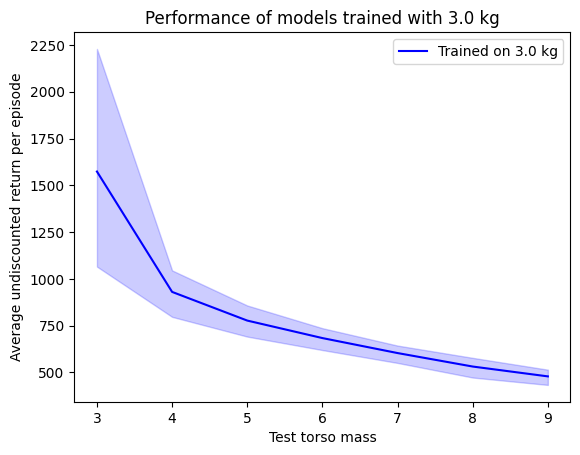

All training sessions and evaluations are complete.


In [ ]:
#Part 3.1.2 (more extensive)

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3 import PPO

class ChangeMassWrapper(gym.Wrapper):
    def __init__(self, env, torso_mass):
        super().__init__(env)
        self.torso_mass = torso_mass
        self.env.unwrapped.model.body_mass[1] = self.torso_mass

#Set the amount of environments to 1
n_envs = 1
training_seeds = [0, 1, 2]

#Set the torso mass to 3
torso_masses = [3.0]

#Test torso masses
test_masses = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

#Increased number of evaluation episodes
eval_episodes = 25

#Evaluation seeds
evaluation_seeds = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]

results = {mass: [] for mass in torso_masses}

for torso_mass in torso_masses:
    trained_models = {}

    #Loading the models
    for seed in training_seeds:
        model_path = f'ppo_hopper_seed_{seed}_torso_1PPOex'
        model = PPO.load(model_path)
        trained_models[seed] = model

    for test_mass in test_masses:
        returns = []
        for seed, model in trained_models.items():
            #Evaluating the model over the test seeds
            episode_returns = []
            for eval_seed in evaluation_seeds:
                test_env = make_vec_env('Hopper-v4', n_envs=n_envs, seed=eval_seed, vec_env_cls=DummyVecEnv,
                                        wrapper_class=lambda env: ChangeMassWrapper(env, torso_mass=test_mass))
                obs = test_env.reset()
                total_reward = 0
                while True:
                    action, _states = model.predict(obs)
                    obs, reward, done, _ = test_env.step(action)
                    total_reward += reward
                    if done:
                        break
                episode_returns.append(total_reward)

            #Averaging the returns
            mean_return = np.mean(episode_returns)
            returns.append(mean_return)

        #Collecting the results
        mean_return = np.mean(returns)
        std_return = np.std(returns)
        percentile_10 = np.percentile(returns, 10)
        percentile_90 = np.percentile(returns, 90)
        results[torso_mass].append((test_mass, mean_return, std_return, percentile_10, percentile_90))

#Plotting the result
colors = {3.0: 'blue', 6.0: 'green', 9.0: 'red'}
for train_mass, data in results.items():
    test_masses, means, stds, p10s, p90s = zip(*data)
    plt.figure()
    plt.plot(test_masses, means, label=f'Trained on {train_mass} kg', color=colors[train_mass])
    plt.fill_between(test_masses, p10s, p90s, color=colors[train_mass], alpha=0.2)
    plt.xlabel('Test torso mass')
    plt.ylabel('Average undiscounted return per episode')
    plt.title(f'Performance of models trained with {train_mass} kg')
    plt.legend()
    plt.savefig(f'performance_trained_{train_mass}kg.png')
    plt.show()

print("All training sessions and evaluations are complete.")


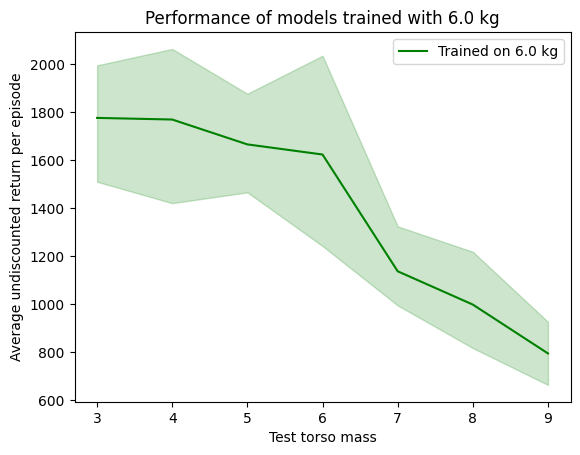

All training sessions and evaluations are complete.


In [ ]:
#Part 3.2.2 (more extensive)

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3 import PPO

class ChangeMassWrapper(gym.Wrapper):
    def __init__(self, env, torso_mass):
        super().__init__(env)
        self.torso_mass = torso_mass
        self.env.unwrapped.model.body_mass[1] = self.torso_mass

#Set the environments to 1
n_envs = 1
training_seeds = [0, 1, 2]

#Defining the torso mass to 6
torso_masses = [6.0]

#Test masses
test_masses = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

#Increased evaluation episodes
eval_episodes = 25

#Evaluation seeds
evaluation_seeds = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]

results = {mass: [] for mass in torso_masses}

for torso_mass in torso_masses:
    trained_models = {}

    #Loading the models
    for seed in training_seeds:
        model_path = f'ppo_hopper_seed_{seed}_torso_2PPOex'
        model = PPO.load(model_path)
        trained_models[seed] = model

    for test_mass in test_masses:
        returns = []
        for seed, model in trained_models.items():
            #Evaluating the model over the test seeds
            episode_returns = []
            for eval_seed in evaluation_seeds:
                test_env = make_vec_env('Hopper-v4', n_envs=n_envs, seed=eval_seed, vec_env_cls=DummyVecEnv,
                                        wrapper_class=lambda env: ChangeMassWrapper(env, torso_mass=test_mass))
                obs = test_env.reset()
                total_reward = 0
                while True:
                    action, _states = model.predict(obs)
                    obs, reward, done, _ = test_env.step(action)
                    total_reward += reward
                    if done:
                        break
                episode_returns.append(total_reward)

            #Averaging returns
            mean_return = np.mean(episode_returns)
            returns.append(mean_return)

        #Collecting the results
        mean_return = np.mean(returns)
        std_return = np.std(returns)
        percentile_10 = np.percentile(returns, 10)
        percentile_90 = np.percentile(returns, 90)
        results[torso_mass].append((test_mass, mean_return, std_return, percentile_10, percentile_90))

#Plotting the result
colors = {3.0: 'blue', 6.0: 'green', 9.0: 'red'}
for train_mass, data in results.items():
    test_masses, means, stds, p10s, p90s = zip(*data)
    plt.figure()
    plt.plot(test_masses, means, label=f'Trained on {train_mass} kg', color=colors[train_mass])
    plt.fill_between(test_masses, p10s, p90s, color=colors[train_mass], alpha=0.2)
    plt.xlabel('Test torso mass')
    plt.ylabel('Average undiscounted return per episode')
    plt.title(f'Performance of models trained with {train_mass} kg')
    plt.legend()
    plt.savefig(f'performance_trained_{train_mass}kg.png')
    plt.show()

print("All training sessions and evaluations are complete.")


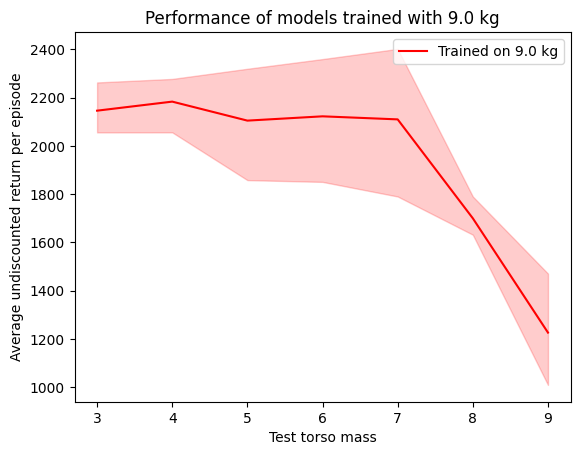

All training sessions and evaluations are complete.


In [ ]:
#Part 3.3.2 (more extensive)

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3 import PPO

class ChangeMassWrapper(gym.Wrapper):
    def __init__(self, env, torso_mass):
        super().__init__(env)
        self.torso_mass = torso_mass
        self.env.unwrapped.model.body_mass[1] = self.torso_mass

#Set the environments to 1
n_envs = 1
training_seeds = [0, 1, 2]

#Set torso mass to 9
torso_masses = [9.0]

#Test torso masses
test_masses = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

#Increased evaluation episodes
eval_episodes = 25

#Evaluation seeds
evaluation_seeds = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]

results = {mass: [] for mass in torso_masses}

for torso_mass in torso_masses:
    trained_models = {}

    #Loading the models
    for seed in training_seeds:
        model_path = f'ppo_hopper_seed_{seed}_torso_3PPOex'
        model = PPO.load(model_path)
        trained_models[seed] = model

    for test_mass in test_masses:
        returns = []
        for seed, model in trained_models.items():
            #Evaluating the model over the evaluation seeds
            episode_returns = []
            for eval_seed in evaluation_seeds:
                test_env = make_vec_env('Hopper-v4', n_envs=n_envs, seed=eval_seed, vec_env_cls=DummyVecEnv,
                                        wrapper_class=lambda env: ChangeMassWrapper(env, torso_mass=test_mass))
                obs = test_env.reset()
                total_reward = 0
                while True:
                    action, _states = model.predict(obs)
                    obs, reward, done, _ = test_env.step(action)
                    total_reward += reward
                    if done:
                        break
                episode_returns.append(total_reward)

            #Averaging the returns
            mean_return = np.mean(episode_returns)
            returns.append(mean_return)

        #Collecting the results
        mean_return = np.mean(returns)
        std_return = np.std(returns)
        percentile_10 = np.percentile(returns, 10)
        percentile_90 = np.percentile(returns, 90)
        results[torso_mass].append((test_mass, mean_return, std_return, percentile_10, percentile_90))

#Plotting the result
colors = {3.0: 'blue', 6.0: 'green', 9.0: 'red'}
for train_mass, data in results.items():
    test_masses, means, stds, p10s, p90s = zip(*data)
    plt.figure()
    plt.plot(test_masses, means, label=f'Trained on {train_mass} kg', color=colors[train_mass])
    plt.fill_between(test_masses, p10s, p90s, color=colors[train_mass], alpha=0.2)
    plt.xlabel('Test torso mass')
    plt.ylabel('Average undiscounted return per episode')
    plt.title(f'Performance of models trained with {train_mass} kg')
    plt.legend()
    plt.savefig(f'performance_trained_{train_mass}kg.png')
    plt.show()

print("All training sessions and evaluations are complete.")
